In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 7. Contours

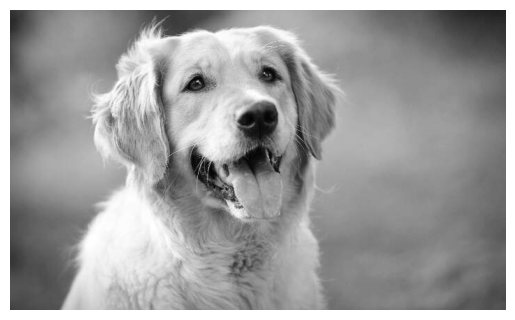

In [46]:
img = cv2.imread('C:/Users/DELL/PycharmProjects/DL/ATV_Training/2_OpenCV/data/dog.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, 'gray')
plt.axis('off')
plt.show()

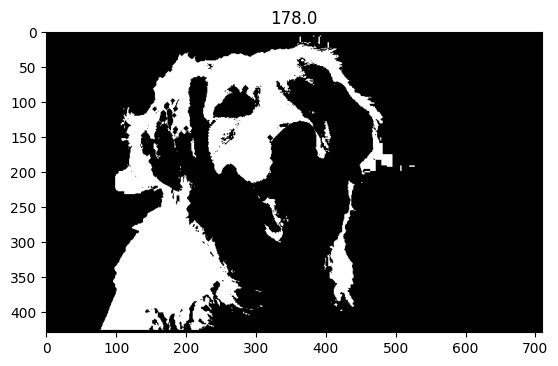

In [25]:
_, th1 = cv2.threshold(img, 178, 255, cv2.THRESH_BINARY)

plt.imshow(th,'gray')
plt.title(_)
plt.show()

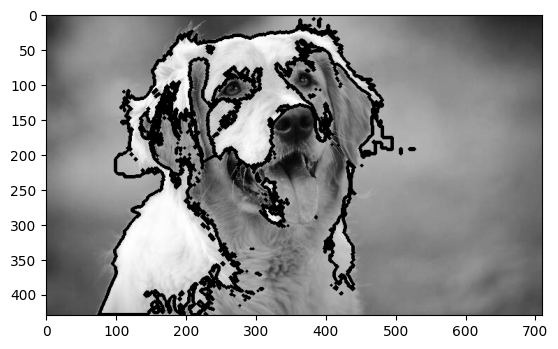

In [28]:
contours, hierachy = cv2.findContours(th1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0,255,0),3) # -1 là để vẽ tất cả các contour, 3 là độ dày của đường vẽ
plt.imshow(img, 'gray')
plt.show()

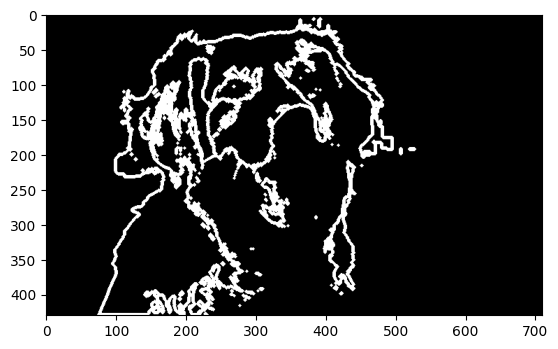

In [37]:
white = np.zeros_like(img)
cv2.drawContours(white, contours, -1, (255,255,0),3)
plt.imshow(white, 'gray')
plt.show()

In [31]:
print(contours[0])

[[[228 427]]

 [[227 428]]

 [[228 429]]

 [[230 429]]]


Contours approximate là giảm số lượng điểm contours dựa trên tỉ lệ với chu vi của hình còn Convex hull là tìm hình bao lồi của hình ảnh

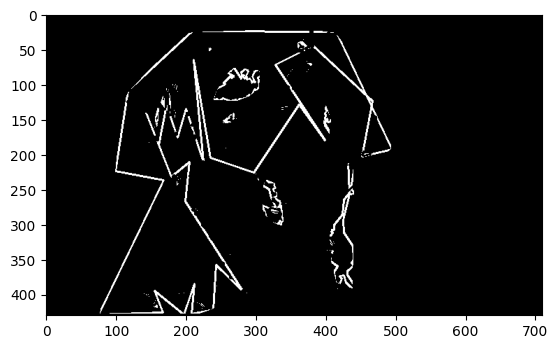

In [42]:
black = np.zeros_like(img)
for cnt in contours:
    epsilon = 0.005 * cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt,epsilon,True)
    hull = cv2.convexHull(cnt)
    cv2.drawContours(black, [cnt], -1, (0, 255, 0), 2)
    cv2.drawContours(black, [approx], -1, (255, 255, 0), 2)
    cv2.drawContours(black, [hull], -1, (0, 0, 255), 2)
plt.imshow(black, 'gray')
plt.show()

### 8. Histogram of Image

- Histogram rộng thì độ tương phản của bức ảnh cao.
- Histogram hẹp thì độ tương phản của bức ảnh thấp.
    - Histogram lệch trái: Ảnh bị tối.
    - Histogram lệch phải: Ảnh bị quá sáng.

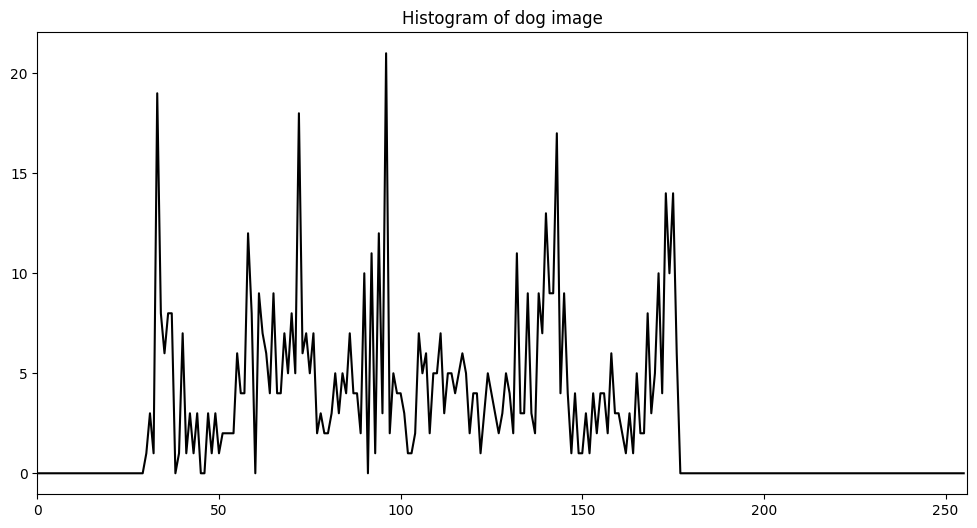

In [ ]:
hist = cv2.calcHist(img, [0], None, [256], [0,256]) # [0] để chỉ kênh màu (0,1,2 cho rgb và 0 nếu là grayscale), [256] là histSize hoặc Bin count, [0,256] là range của ảnh
plt.figure(figsize=(12,6))
plt.plot(hist, 'black')
plt.title('Histogram of dog image')
plt.xlim([0,256])
plt.show()

Calculate histogram of an image with mask

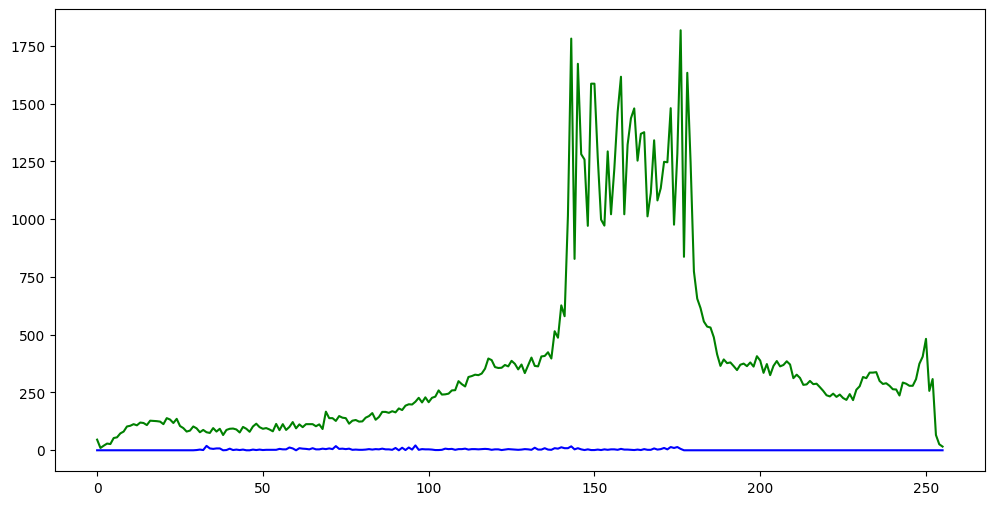

In [ ]:
mask = np.zeros_like(img)
mask[100:300,100:600] = 255
img_mask = cv2.bitwise_and(img,mask)
hist1 = cv2.calcHist([img], [0], mask, [256],[0,256])

plt.figure(figsize=(12,6))
plt.plot(hist1, 'green')
plt.plot(hist, 'blue')
plt.show()

Ta sử dụng histogram equaliztion để cân bằng histogram từ đó tăng độ tương phản của bức ảnh thiếu sáng hoặc sáng quá. Tuy nhiên. trong nhiều trường hợp việc cân bằng với toàn bộ bức ảnh không mang lại hiệu quả cao nếu chỉ có 1 phần bức ảnh có độ tương phản thấp nên có thể áp dụng CLAHE để cân bằng histogram tại từng phần của bức ảnh.

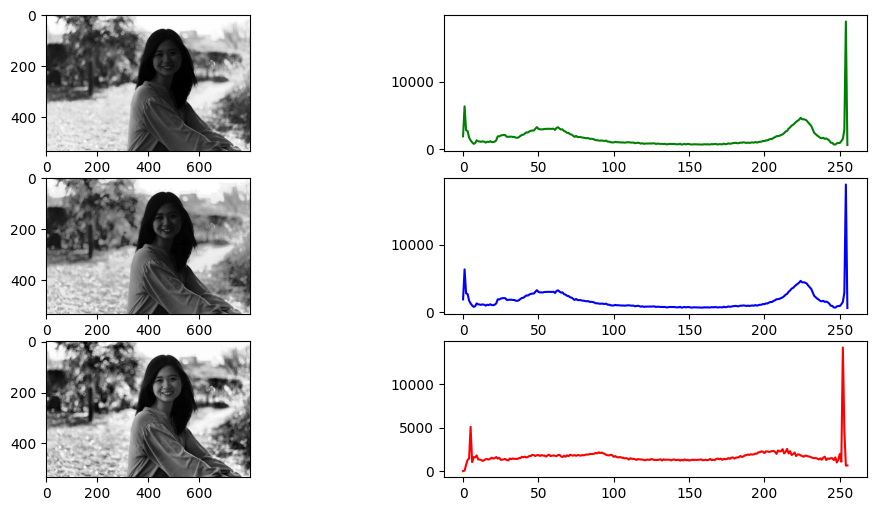

In [73]:
img_low = cv2.imread('C:/Users/DELL/PycharmProjects/DL/ATV_Training/2_OpenCV/data/sample.jpg', 0)
hist3 = cv2.calcHist([img_low], [0], None, [256], [0, 256])

equalhist_img = cv2.equalizeHist(img_low)
hist4 = cv2.calcHist([img_low], [0], None, [256], [0, 256])

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)) # clip limit là giới hạn cắt của histogram - giá trị quá cao có thể bị nhiễu, 
                                                           # titleGridSize là bức ảnh được chia thành các lưới với các ô nhỏ có kích thước 8x8
cl1 = clahe.apply(img_low)
hist5 = cv2.calcHist([cl1], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))
plt.subplot(3, 2, 1), plt.imshow(img_low, 'gray')
plt.subplot(3, 2, 2), plt.plot(hist3, 'green')
plt.subplot(3, 2, 3), plt.imshow(equalhist_img, 'gray')
plt.subplot(3, 2, 4), plt.plot(hist4, 'blue')
plt.subplot(3, 2, 5), plt.imshow(cl1, 'gray')
plt.subplot(3, 2, 6), plt.plot(hist5, 'red')
plt.show()

### 9. Template matching

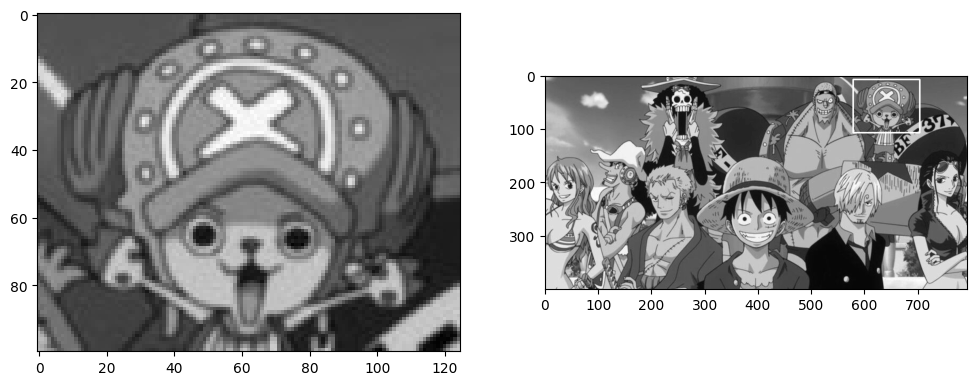

[[-0.12105844 -0.11399537 -0.10629468 ... -0.16529213 -0.1544292
  -0.14748573]
 [-0.10734974 -0.10023172 -0.09270436 ... -0.16241275 -0.15103693
  -0.14406167]
 [-0.09384984 -0.08660018 -0.079179   ... -0.15839444 -0.14612396
  -0.1377234 ]
 ...
 [-0.15100925 -0.14227602 -0.12591843 ... -0.15193625 -0.14584938
  -0.13753502]
 [-0.14481844 -0.13533793 -0.11989953 ... -0.14313102 -0.13735817
  -0.12908332]
 [-0.13468572 -0.12365922 -0.11066755 ... -0.13181639 -0.12541717
  -0.11653872]]


In [ ]:
template = cv2.imread('C:/Users/DELL/PycharmProjects/DL/ATV_Training/2_OpenCV/data/template_OP.jpg', 0)
img = cv2.imread('C:/Users/DELL/PycharmProjects/DL/ATV_Training/2_OpenCV/data/OP.jpg', 0)
w,h = template.shape[::-1] # Lấy kích thước template

result = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1]+ h)

cv2.rectangle(img, top_left, bottom_right, 255, 2)

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1), plt.imshow(template, 'gray')
plt.subplot(1,2,2), plt.imshow(img, 'gray')
plt.show()

### 10. Hough Line/ Circle transform

#### 10.1. Hough Line Transform

Thay vì việc sử dụng phương trình y = ax + b (a có thể bị kéo đến vô hạn) thì hough line transform sử dụng phương trình toạ độ cực *rho = x.cos(theta) + y.sin(theta)* với rho là khoảng cách từ gốc toạ độ đến đường thẳng, theta là góc giữa trục x và pháp tuyến của đường thẳng.

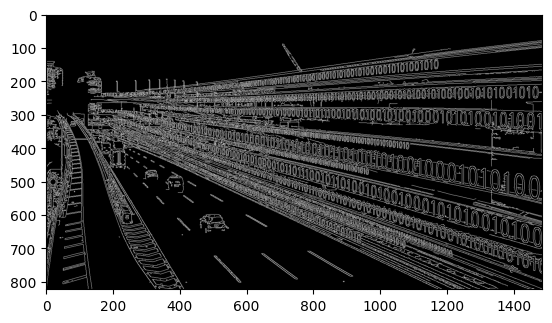

In [126]:
img_linetrans1 = cv2.imread('C:/Users/DELL/PycharmProjects/DL/ATV_Training/2_OpenCV/data/line_transform.jpg')
img_linetrans2 = cv2.cvtColor(img_linetrans1, cv2.COLOR_BGR2RGB)
img_linetrans = cv2.cvtColor(img_linetrans1, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img_linetrans, 50, 150)
plt.imshow(edges, 'gray')

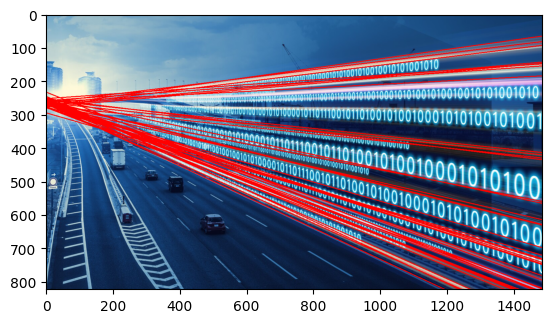

In [116]:
lines = cv2.HoughLines(edges, 1, np.pi/180, 500) # 1 là độ nhảy của p, np.pi/180 góc quay của theta (mỗi bước tăng 1 độ), 
                                                 # 200 là số lượng điểm ảnh cùng nằm trên 1 đường thẳng để nó được coi là 1 đường thẳng
for line in lines:
    rh0, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = rh0*a
    y0 = rh0*b
    x1 = int(x0 - 2000*b)
    y1 = int(y0 + 2000*a)
    x2 = int(x0 + 2000*b)
    y2 = int(y0 - 2000*a)
    cv2.line(img_linetrans2, (x1, y1), (x2, y2), (255, 0, 0), 2)
plt.imshow(img_linetrans2)
plt.show()


Một phiên bản cải tiến hơn của hough transform là probabilistic hough transform dựa trên 2 tham số minLineLength: Độ dài đường thẳng ngắn nhất chấp nhận được, và maxLineGap: Độ dài lớn nhất giữa 2 đường thẳng để nó được coi là 1 đường thẳng liền mạch

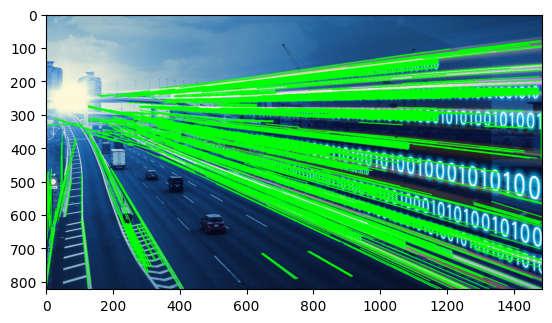

In [134]:
lines1 = cv2.HoughLinesP(edges, 1, np.pi/ 180, 110, minLineLength = 100, maxLineGap = 10)
for i in range(len(lines1)):
    for x1, y1, x2, y2 in lines1[i]:
        cv2.line(img_linetrans2, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(img_linetrans2)
plt.show()

#### 10.2. Hough Circle Transform

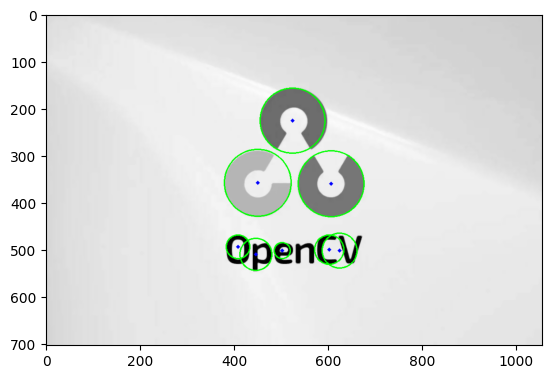

In [ ]:
img = cv2.imread('C:/Users/DELL/PycharmProjects/DL/ATV_Training/2_OpenCV/data/OpenCV-Wall.jpg',0)
img = cv2.medianBlur(img, 5)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20,
                            param1=50, param2=30, minRadius=0, maxRadius=0)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
    cv2.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)
plt.imshow(cimg, 'gray')
plt.show()

### 11. Image Segmentation

Đơn giản bằng cách sử dụng threshold binary và otsu binarization

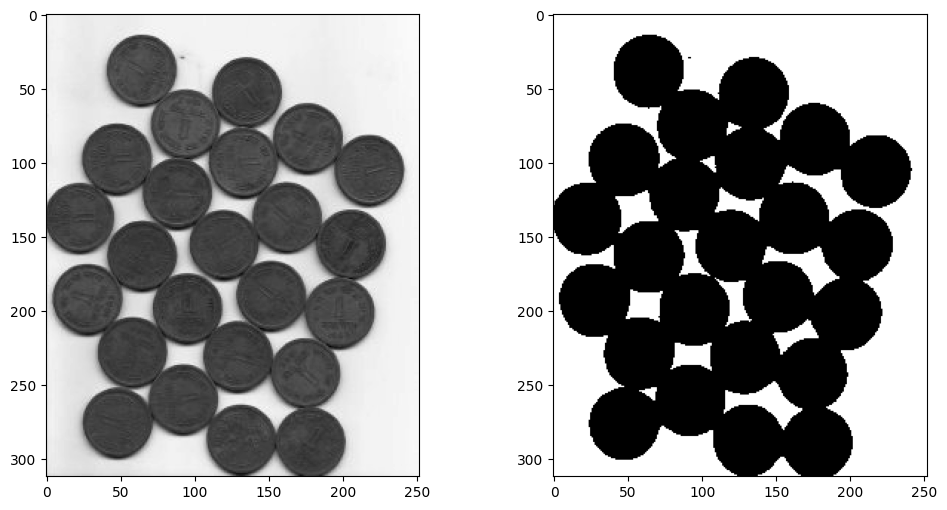

In [152]:
seg = cv2.imread('C:/Users/DELL/PycharmProjects/DL/ATV_Training/2_OpenCV/data/water_coins.jpg', 0)
_, th = cv2.threshold(seg, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(seg, 'gray')
plt.subplot(1,2,2)
plt.imshow(th, 'gray')
plt.show()

- Watershed Algorithm

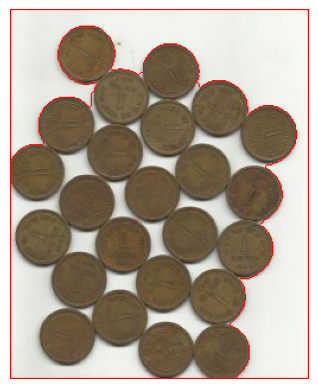

In [ ]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(th,cv2.MORPH_OPEN,kernel, iterations = 2)

sure_bg = cv2.dilate(opening,kernel,iterations=3)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

img_hh = cv2.imread('C:/Users/DELL/PycharmProjects/DL/ATV_Training/2_OpenCV/data/water_coins.jpg')
cv2.watershed(img_hh, markers)
img_hh[markers == -1] = [0, 0, 255]  

plt.imshow(cv2.cvtColor(img_hh, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

### 12. Image Denoising

- cv2.fastNIMeansDenoising() - Giảm nhiễu với ảnh grayscale
- cv2.fastNIMeansDenoisingColored() - Tương tự như trên nhưng cho ảnh có màu
- cv2.fastNIMeansDenoisingMulti() - Giảm nhiễu với 1 chuỗi ảnh liền kề (video) grayscale
- cv2.fastNIMeansDenoisingColoredMulti()

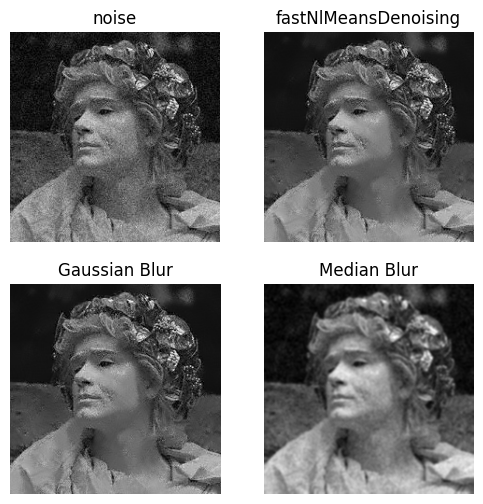

In [ ]:
noise_img = cv2.imread('C:/Users/DELL/PycharmProjects/DL/ATV_Training/2_OpenCV/data/noise.jpg', 0)
denoised1 = cv2.fastNlMeansDenoising(noise_img, None, h=10, templateWindowSize=7, searchWindowSize=21) 
# h = 10 là độ lọc nhiễu (giá trị càng cao thì lọc nhiễu càng mạnh nhưng dẫn đến mất chi tiết)
# templateWindowSize kích thước cửa sổ mẫu dùng để so sánh các vùng ảnh
# searchWindowSize kích thước vùng tìm kiếm xung quanh mỗi pixel để so sánh (Càng lớn giảm nhiễu càng tốt nhưng chậm đi)

denoised2 = cv2.GaussianBlur(noise_img, (5, 5), 0)
denoised3 = cv2.medianBlur(noise_img, 5)

title = ['noise', 'fastNlMeansDenoising', 'Gaussian Blur', 'Median Blur']
img_list = [noise_img, denoised, denoised1, denoised2]

plt.figure(figsize=(6, 6))
for i in range(len(img_list)):
    plt.subplot(2, 2, i+1)
    plt.imshow(img_list[i], 'gray')
    plt.title(title[i])
    plt.axis('off')
plt.show()

### 13. Image Inpainting

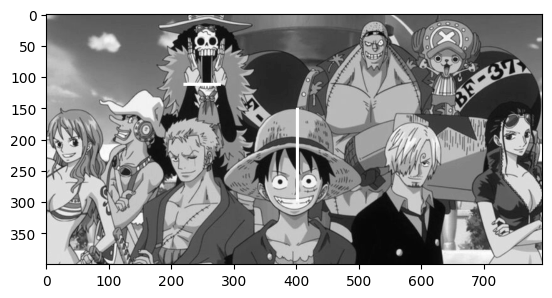

In [196]:
img_inpaint = cv2.imread('C:/Users/DELL/PycharmProjects/DL/ATV_Training/2_OpenCV/data/OP.jpg', 0)
black = np.zeros_like(img_inpaint)
black[110:115, 220: 280] = 255
black[150:300, 400: 405] = 255
img_new = cv2.bitwise_or(img_inpaint, black)
plt.imshow(img_new, 'gray')

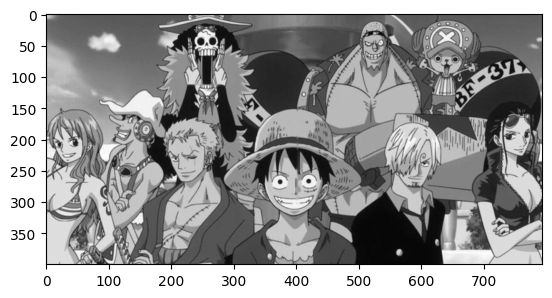

In [ ]:
dst = cv2.inpaint(img_new, black, 3, cv2.INPAINT_TELEA)
plt.imshow(dst, 'gray')